**Importing necessary packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

**Preparing the CIFAR10 dataset**

In [2]:
from tensorflow.keras import datasets
(train_images, train_labels), (test_images,test_labels)=datasets.cifar10.load_data()

**Splitting the dataset into training, validaiton and testing set**
**(Training set of 40000 images,validation set of 10000 images, and the test set consisting of the remaining 10000 images.)**

In [3]:
val_images = train_images[:10000]
val_labels = train_labels[:10000]
partial_train_images = train_images[10000:]
partial_train_labels = train_labels[10000:]

**Scaling the pixel values so they lie in the range of 0-1**

In [4]:
partial_train_images = partial_train_images / 255.
val_images = val_images / 255.
test_images = test_images /255

**Printing the shape of training,validation and test set**

In [5]:
partial_train_images.shape

(40000, 32, 32, 3)

In [6]:
val_images.shape

(10000, 32, 32, 3)

In [7]:
test_images.shape

(10000, 32, 32, 3)

# Model 

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64,kernel_size= (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(partial_train_images, partial_train_labels, epochs=20,validation_data=(val_images, val_labels))

Epoch 1/20
1250/1250 [==============================] - 29s 23ms/step - loss: 1.5864 - accuracy: 0.4211 - val_loss: 1.3766 - val_accuracy: 0.5045
Epoch 2/20
1250/1250 [==============================] - 28s 23ms/step - loss: 1.2435 - accuracy: 0.5575 - val_loss: 1.1572 - val_accuracy: 0.5831
Epoch 3/20
1250/1250 [==============================] - 28s 23ms/step - loss: 1.0991 - accuracy: 0.6134 - val_loss: 1.0381 - val_accuracy: 0.6288
Epoch 4/20
1250/1250 [==============================] - 28s 23ms/step - loss: 0.9998 - accuracy: 0.6475 - val_loss: 0.9842 - val_accuracy: 0.6568
Epoch 5/20
1250/1250 [==============================] - 28s 23ms/step - loss: 0.9253 - accuracy: 0.6775 - val_loss: 0.9306 - val_accuracy: 0.6763
Epoch 6/20
1250/1250 [==============================] - 29s 23ms/step - loss: 0.8562 - accuracy: 0.6996 - val_loss: 0.9356 - val_accuracy: 0.6807
Epoch 7/20
1250/1250 [==============================] - 28s 23ms/step - loss: 0.8055 - accuracy: 0.7192 - val_loss: 0.9187 -

**Adding Batch Normalization**

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64,kernel_size= (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(partial_train_images, partial_train_labels, epochs=20,validation_data=(val_images, val_labels))

Epoch 1/20
1250/1250 [==============================] - 60s 48ms/step - loss: 1.3792 - accuracy: 0.5068 - val_loss: 1.3082 - val_accuracy: 0.5411
Epoch 2/20
1250/1250 [==============================] - 59s 47ms/step - loss: 1.0154 - accuracy: 0.6432 - val_loss: 1.1779 - val_accuracy: 0.5927
Epoch 3/20
1250/1250 [==============================] - 60s 48ms/step - loss: 0.8561 - accuracy: 0.6993 - val_loss: 1.0271 - val_accuracy: 0.6526
Epoch 4/20
1250/1250 [==============================] - 56s 45ms/step - loss: 0.7458 - accuracy: 0.7368 - val_loss: 1.3790 - val_accuracy: 0.5892
Epoch 5/20
1250/1250 [==============================] - 57s 45ms/step - loss: 0.6552 - accuracy: 0.7702 - val_loss: 1.0348 - val_accuracy: 0.6624
Epoch 6/20
1250/1250 [==============================] - 56s 45ms/step - loss: 0.5820 - accuracy: 0.7942 - val_loss: 1.2980 - val_accuracy: 0.6337
Epoch 7/20
1250/1250 [==============================] - 58s 46ms/step - loss: 0.5194 - accuracy: 0.8154 - val_loss: 1.0575 -

**Adding Regularization**

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(filters=30,kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=120,kernel_size= (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='softmax',kernel_regularizer=tf.keras.regularizers.l1(0.01),activity_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dense(10))

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(partial_train_images, partial_train_labels, epochs=20,validation_data=(val_images, val_labels))

Epoch 1/20
1250/1250 [==============================] - 62s 50ms/step - loss: 2.7658 - accuracy: 0.2302 - val_loss: 2.0879 - val_accuracy: 0.2439
Epoch 2/20
1250/1250 [==============================] - 61s 49ms/step - loss: 1.9843 - accuracy: 0.2694 - val_loss: 1.9074 - val_accuracy: 0.2801
Epoch 3/20
1250/1250 [==============================] - 60s 48ms/step - loss: 1.8872 - accuracy: 0.3011 - val_loss: 1.9802 - val_accuracy: 0.2681
Epoch 4/20
1250/1250 [==============================] - 59s 47ms/step - loss: 1.8267 - accuracy: 0.3252 - val_loss: 1.9010 - val_accuracy: 0.3003
Epoch 5/20
1250/1250 [==============================] - 58s 47ms/step - loss: 1.7720 - accuracy: 0.3440 - val_loss: 1.7576 - val_accuracy: 0.3471
Epoch 6/20
1250/1250 [==============================] - 66s 52ms/step - loss: 1.7305 - accuracy: 0.3581 - val_loss: 1.7494 - val_accuracy: 0.3522
Epoch 7/20
1250/1250 [==============================] - 65s 52ms/step - loss: 1.6969 - accuracy: 0.3821 - val_loss: 1.6785 -

**Plot for training and validation loss per epoch**

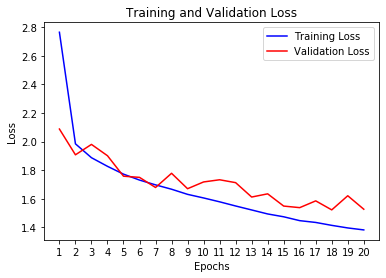

In [14]:
history.history.keys()
history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss'] 

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plot for training and validation accuracy per epoch.**

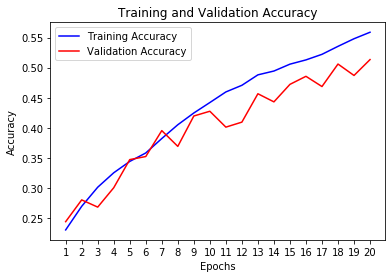

In [15]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()